# Motivación del TFM

El ciclotrón es un tipo de acelerador de partículas utilizado para el tratamiento de pacientes con tumores en una técnica radioterápica conocida como protonterapia. Uno de los componentes principales del acelerador es la bobina superconductora, la cual crea el intenso campo magnético encargado de deflectar el haz de radiación en su trayectoria dentro del ciclotrón. El posicionamiento espacial de esta bobina es crítico para garantizar la precisión con la que se entrega la dosis de radiación en el paciente. Los cambios de temperatura en el medio circundante pueden inducir variaciones en las fuerzas de tensión que atúan sobre la bobina, y estos cambios, a su vez, provocar desplazamientos en los planos radiales y axiales. Un desplazamiento tan pequeño como 1 mm, induce una fuerza magnética sobre la bobina de miles de newtons que podrían hacer colapsar los soportes de la bobina o desalinear el haz de radiación, provocando una pérdida de la precisión en la irradiación del paciente. En este trabajo se propone analizar las series temporales generadas al medir, durante un período de más de un año, las variaciones de las fuerzas sobre las barras de soporte de la bobina, en función de la temperatura, para predecir los desplazamientos axiales y radiales de ésta. Con esta información se pretende crear un modelo predictivo simple para explicar la relación del desplazamiento del centroide del haz de radiación con los desplazamientos de la bobina superconductora.

# Hipótesis del trabajo

En este trabajo se quiere probar la hipótesis de que los cambios de temperatura en el medio circundante a la bobina superconductora de un ciclotón podría explicar la desalineación espacial del centroide del haz de radiación en el isocentro.

In [ ]:
# Load data
import pandas as pd
from datetime import timedelta
import io
from google.colab import files
# Manipulation and visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import itertools
import matplotlib.colors as mcolors
#import seaborn as sns; sns.set()

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

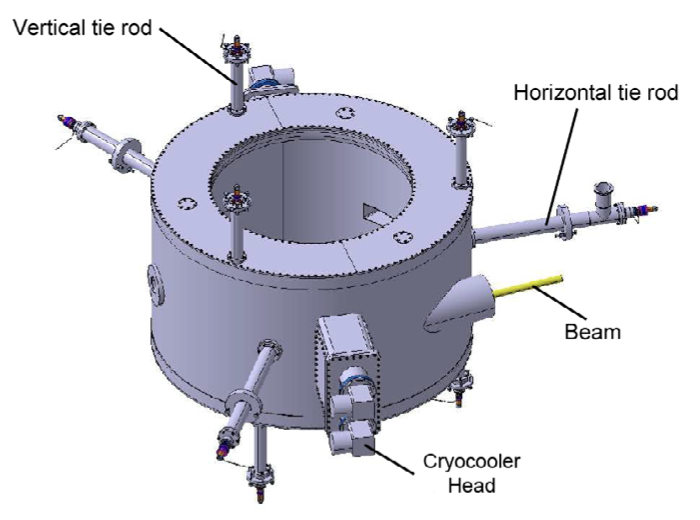

# Carga de Series temporales y graficas

In [ ]:
#from google.colab import files

uploaded = files.upload()

Saving gauge_7-9_2022.csv to gauge_7-9_2022.csv


In [ ]:
# Cargamos los DataFrames
#df1 = pd.read_csv(io.BytesIO(uploaded['gauge_1-3_2022.csv']))
#df2 = pd.read_csv(io.BytesIO(uploaded['gauge_1-3_2023.csv']))
#df3 = pd.read_csv(io.BytesIO(uploaded['gauge_4-6_2022.csv']))
#df4 = pd.read_csv(io.BytesIO(uploaded['gauge_4-6_2023.csv']))
df1 = pd.read_csv(io.BytesIO(uploaded['gauge_7-9_2022.csv']))
#df1 = pd.read_csv(io.BytesIO(uploaded['gauge_7-9_2023.csv']))

In [ ]:
# Creamos las series temporales
ts_gauge7_2022 = pd.DataFrame(df1, columns=['time','Strain_Gauge_7']).set_index('time')
ts_gauge8_2022 = pd.DataFrame(df1, columns=['time','Strain_Gauge_8']).set_index('time')
ts_gauge9_2022 = pd.DataFrame(df1, columns=['time','Strain_Gauge_9']).set_index('time')
ts_temp_2022 = pd.DataFrame(df1, columns=['time','Vault_temp']).set_index('time')
ts_humi_2022 = pd.DataFrame(df1, columns=['time','Vault_humidity']).set_index('time')

In [ ]:
# Configuramos el tamaño de las letras
#plt.rcParams.update({'font.size': 8})

#plt.rc('font', size=8)          # controls default text sizes
#plt.rc('axes', titlesize=8)     # fontsize of the axes title
#plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
#plt.rc('legend', fontsize=8)    # legend fontsize
#plt.rc('figure', titlesize=12)  # fontsize of the figure title

<Axes: xlabel='Tiempo', ylabel='Fuerza (N)'>

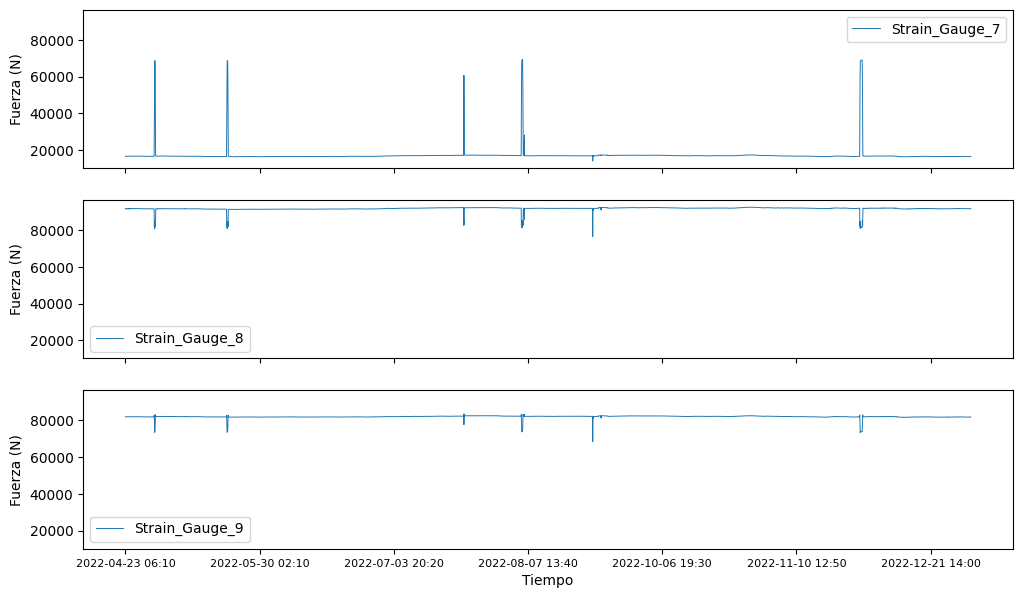

In [ ]:
# Graficamos las series
fig, axes = plt.subplots(figsize=(12,7),nrows=3, ncols=1, sharex=True, sharey=True)

#add DataFrames to subplots
ts_gauge7_2022.plot(ax=axes[0], linewidth=0.7, ylabel='Fuerza (N)', xlabel='Tiempo')
ts_gauge8_2022.plot(ax=axes[1], linewidth=0.7, ylabel='Fuerza (N)', xlabel='Tiempo')
ts_gauge9_2022.plot(ax=axes[2], linewidth=0.7, ylabel='Fuerza (N)', xlabel='Tiempo')

Se observa para las tres fuerzas los valores atípicos en el mismo tiempo. Esto puede deberse a mantenimientos programados en donde el campo magnético se ha reducido.

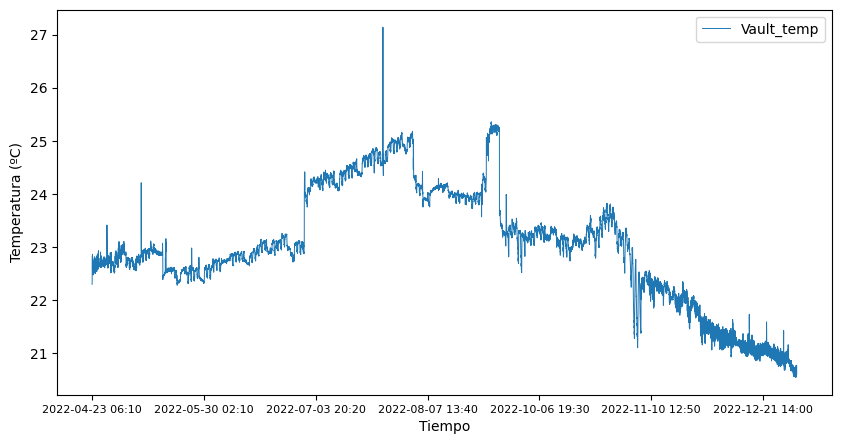

In [ ]:
# Graficamos la temperatura del vault
ts_temp_2022.plot(figsize=(10,5),linewidth=0.7,ylabel='Temperatura (ºC)', xlabel='Tiempo');

Graficamos la temperatura para los primeros 1000 puntos para apreciar su variación en el tiempo.

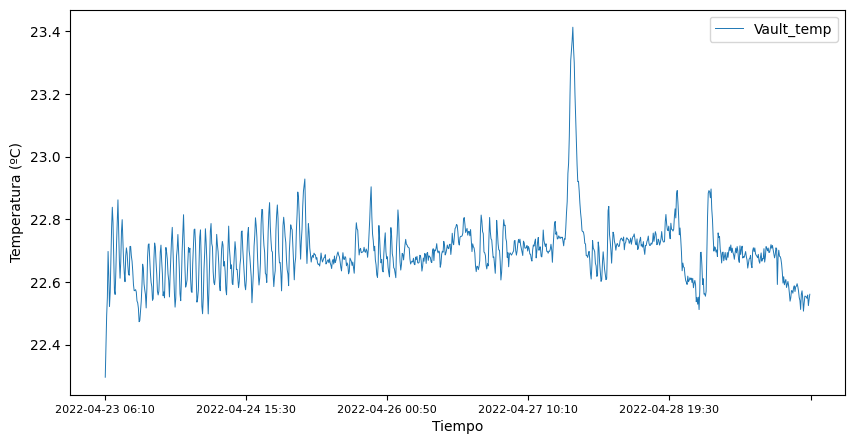

In [ ]:
ts_temp_2022.iloc[0:1000].plot(figsize=(10,5),linewidth=0.7,ylabel='Temperatura (ºC)', xlabel='Tiempo');

Graficamos la humedad para los primeros 1000 puntos

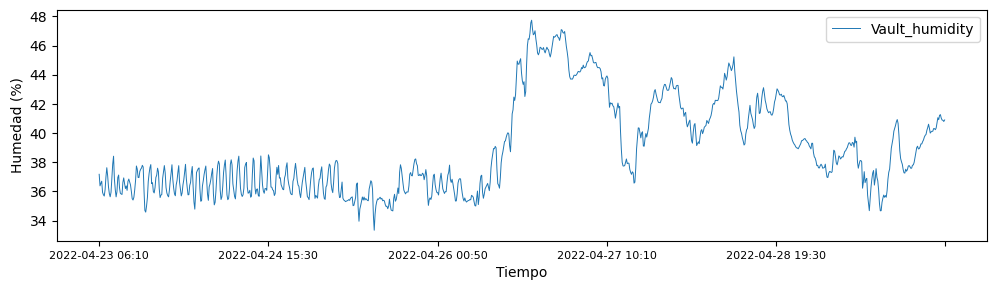

In [ ]:
ts_humi_2022.iloc[0:1000].plot(figsize=(12,3),linewidth=0.7,ylabel='Humedad (%)', xlabel='Tiempo');

Observamos que la fuerza varía con la temperatura y oscila en función del tiempo.

Text(0.5, 1.0, 'Tensión 7 - 2022')

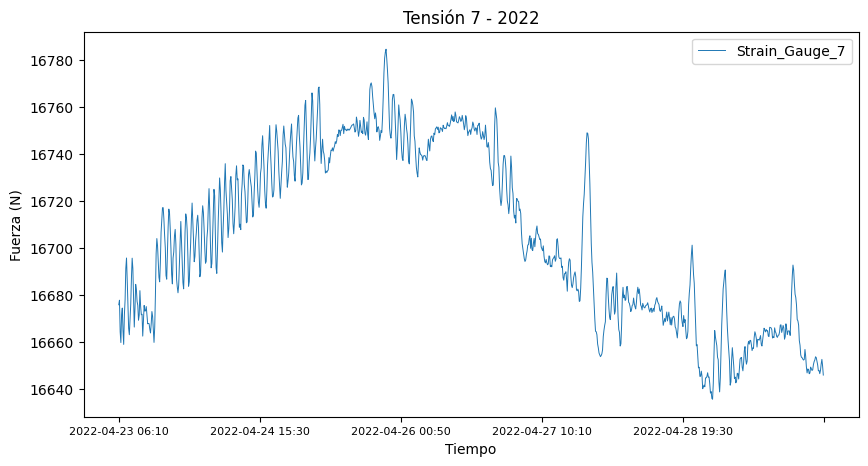

In [ ]:
ts_gauge7_2022.iloc[0:1000].plot(figsize=(10,5), linewidth=0.7, ylabel='Fuerza (N)', xlabel='Tiempo')
plt.title('Tensión 7 - 2022')

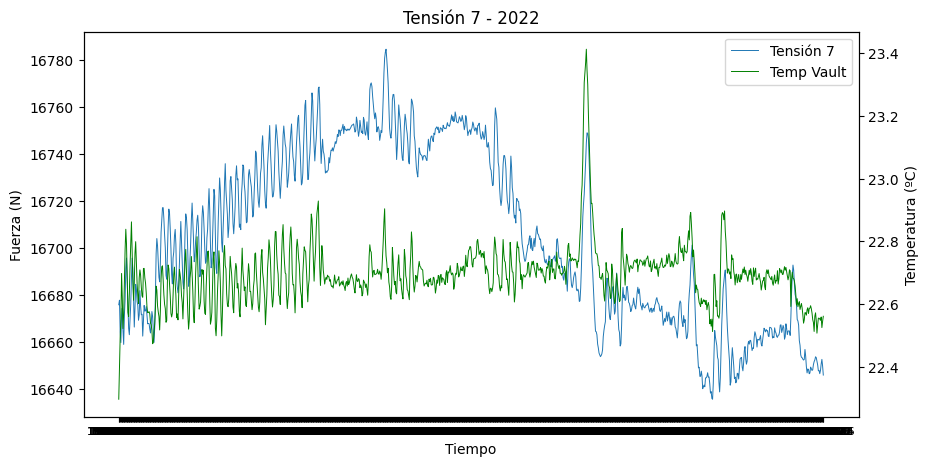

In [ ]:
import matplotlib.dates as mdates

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot the data
ax1.plot(df1.time.iloc[0:1000], df1.Strain_Gauge_7.iloc[0:1000],label='Tensión 7',linewidth=0.7)
ax2 = ax1.twinx()
ax2.plot(df1.time.iloc[0:1000], df1.Vault_temp.iloc[0:1000], color='g', label='Temp Vault',linewidth=0.7)
ax2.set_ylabel('Temperatura (ºC)')
ax2.tick_params(axis='y', labelcolor='k')

# Create a DateFormatter object to format the x-axis labels
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format as 'YYYY-MM-DD'

# Apply the date format to the x-axis
ax1.xaxis.set_major_formatter(date_format)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

ax1.set_ylabel('Fuerza (N)')
ax1.set_xlabel('Tiempo')
plt.title('Tensión 7 - 2022')
# Show the plot
plt.show()

Text(0, 0.5, 'Temperatura (ºC)')

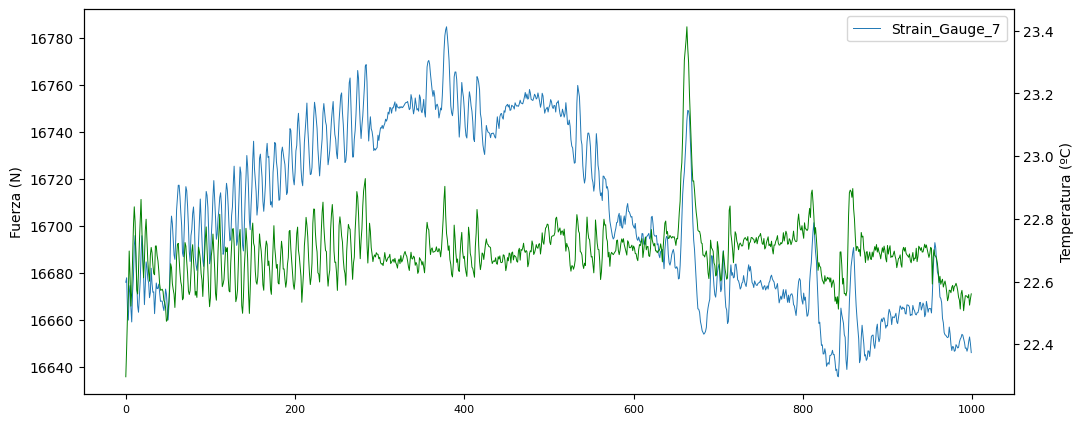

In [ ]:
fig, ax = plt.subplots()
df1.Strain_Gauge_7.iloc[0:1000].plot(figsize=(12,5),linewidth=0.7)
plt.legend(loc='best')
df1.Vault_temp.iloc[0:1000].plot(secondary_y=True, style='g',linewidth=0.7)
ax.set_ylabel('Fuerza (N)')
ax.right_ax.set_ylabel('Temperatura (ºC)')

Text(0, 0.5, 'Temperatura (ºC)')

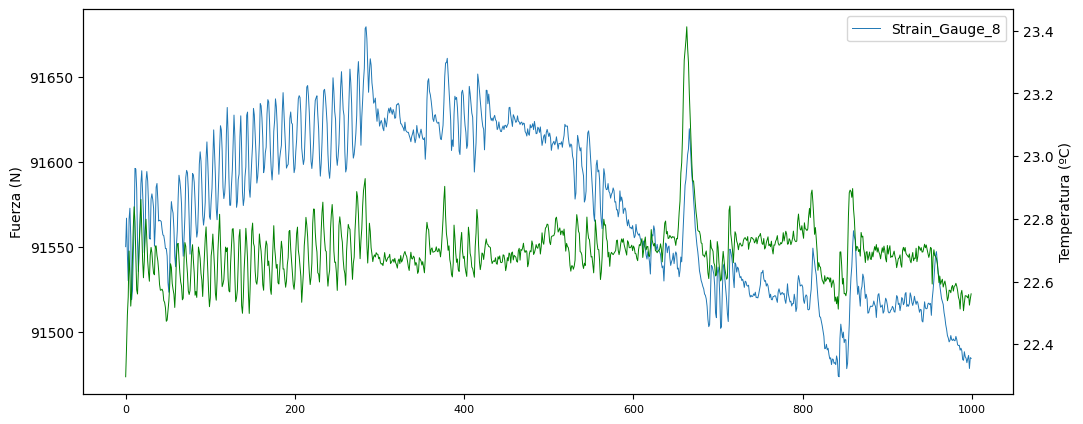

In [ ]:
fig, ax = plt.subplots()
df1.Strain_Gauge_8.iloc[0:1000].plot(figsize=(12,5),linewidth=0.7)
plt.legend(loc='best')
df1.Vault_temp.iloc[0:1000].plot(secondary_y=True, style='g',linewidth=0.7)
ax.set_ylabel('Fuerza (N)')
ax.right_ax.set_ylabel('Temperatura (ºC)')

Text(0, 0.5, 'Temperatura (ºC)')

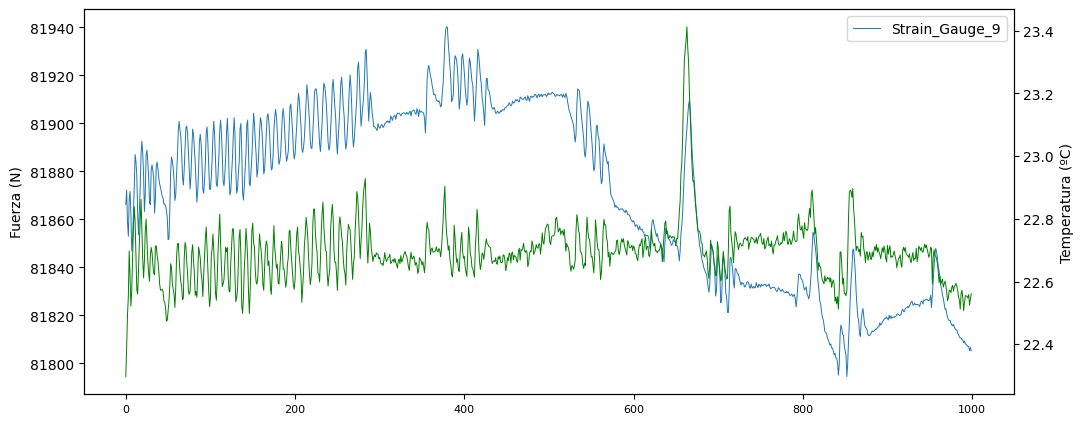

In [ ]:
fig, ax = plt.subplots()
df1.Strain_Gauge_9.iloc[0:1000].plot(figsize=(12,5),linewidth=0.7)
plt.legend(loc='best')
df1.Vault_temp.iloc[0:1000].plot(secondary_y=True, style='g',linewidth=0.7)
ax.set_ylabel('Fuerza (N)')
ax.right_ax.set_ylabel('Temperatura (ºC)')

Como la serie está muestrada de manera irregular, vamos a interpolar la serie.

In [ ]:
# Primero vamos a determinar la cantidad de missing values de las series
df1.tail()

,time,Strain_Gauge_7,Strain_Gauge_8,Strain_Gauge_9,Vault_temp,Vault_humidity
31495,2022-12-31 23:10,16526.790723,91586.844792,81731.907878,20.770524,32.300444
31496,2022-12-31 23:20,16534.932894,91607.316211,81749.608594,20.685519,31.526414
31497,2022-12-31 23:30,16531.200260,91601.119531,81750.428646,20.672372,31.364692
31498,2022-12-31 23:40,16521.490169,91586.578841,81734.137695,20.604432,33.093879
31499,2022-12-31 23:50,16518.016455,91574.054427,81721.526823,20.600725,34.306465


In [ ]:
# Extraer primer y ultimo elementos
#print(f"Primer elemento: {df1['time'].iloc[0]} Ultimo elemento: {df1['time'].iloc[-1]}")

# Las series consisten en 31500 elementos en el rango de fechas mostrado. Vamos
# a estimar el tamano de la serie sin missing values

# convert timestamp column to datetime data type
df1['time'] = pd.to_datetime(df1['time'], format='%Y-%m-%d %H:%M:%S')

# Restamos el ultimo y primer elemento de la serie
delta = df1['time'].iloc[-1] - df1['time'].iloc[0]

# El timedelta resultante se transforma a minutos
total_minutes = delta.total_seconds() / 60

# Los minutos totales se dividen por 10 para obtener el tamano total de la serie
series_elements = 1 + total_minutes/10
#print(series_elements)

delta = df1['time'].iloc[-1] - df1['time'].iloc[0]
#delta

import datetime

start_timestamp = datetime.datetime(2022, 4, 23, 6, 10)  # Specify the starting timestamp 2022
#start_timestamp = datetime.datetime(2023, 1, 1, 0, 0)  # Specify the starting timestamp 2023
num_entries = series_elements  # Number of timestamps to generate

timestamps = []

for i in range(int(num_entries)):
    timestamp = start_timestamp + datetime.timedelta(minutes=10*i)
    timestamps.append(timestamp)

# Las series consisten en 31500 elementos en el rango de fechas mostrado. Vamos
# a estimar el tamano de la serie sin missing values
full_timestep_series = pd.Series(timestamps)


missing_timestep_series = df1['time']

# Hacemos un mapeo para asignar los indices de la serie A 0...36394 a la serie B
# con valores faltantes

def mapping_idx(seriesA, seriesB):
  """ Esta funcion requiere dos series como parametros y retorna una serie cuyos
  indices estan mapeados de la serie A a la serie B para aquellos elementos que
  son iguales en las series
  """

  # Create a mapping between elements in series A and their indexes
  index_mapping = {element: idx for idx, element in seriesA.items()}

  # Assign indexes from seriesA to seriesB when elements match
  mapped_indexes = [index_mapping[element] if element in index_mapping else pd.NA for element in seriesB]

  # Assign the mapped indexes to a new column in seriesB
  seriesB_mapped = seriesB.copy()
  seriesB_mapped.index = mapped_indexes
  return seriesB_mapped


mapping_idx(full_timestep_series, missing_timestep_series)

newcolumn = mapping_idx(full_timestep_series, missing_timestep_series)

newdf = pd.DataFrame({'time': full_timestep_series, 'Strain_Gauge_7': df1['Strain_Gauge_7']})

# Creo un nuevo dataframe df1 con el mapeo correcto de los indices
newdf1 = pd.DataFrame({'time': newcolumn, 'Strain_Gauge_7': df1['Strain_Gauge_7'].tolist(),
                       'Strain_Gauge_8': df1['Strain_Gauge_8'].tolist(),
                       'Strain_Gauge_9': df1['Strain_Gauge_9'].tolist(),
                       'Vault_temp': df1['Vault_temp'].tolist(),
                       'Vault_humidity': df1['Vault_humidity'].tolist()})

# Se crea un nuevo dataframe con los missing values
# Define the desired index range
desired_index = range(newdf1.index.min(), newdf1.index.max() + 1)

# Reindex the DataFrame with the desired index range and fill missing elements with np.nan
result_df1 = newdf1.reindex(desired_index).fillna(np.nan)

result_df1


,time,Strain_Gauge_7,Strain_Gauge_8,Strain_Gauge_9,Vault_temp,Vault_humidity
0,2022-04-23 06:10:00,16675.913102,91550.038411,81866.205924,22.296123,37.170681
1,2022-04-23 06:20:00,16677.835254,91566.795638,81872.151432,22.387631,36.378888
2,2022-04-23 06:30:00,16664.414762,91545.508529,81858.918750,22.493406,36.554563
3,2022-04-23 06:40:00,16659.816976,91530.027734,81852.897721,22.550683,36.697578
4,2022-04-23 06:50:00,16671.603190,91566.127995,81868.152865,22.697437,35.932185
...,...,...,...,...,...,...
36390,2022-12-31 23:10:00,16526.790723,91586.844792,81731.907878,20.770524,32.300444
36391,2022-12-31 23:20:00,16534.932894,91607.316211,81749.608594,20.685519,31.526414
36392,2022-12-31 23:30:00,16531.200260,91601.119531,81750.428646,20.672372,31.364692
36393,2022-12-31 23:40:00,16521.490169,91586.578841,81734.137695,20.604432,33.093879


Graficamos una de las series con missing values

Text(0.5, 1.0, 'Tensión 7 - 2022')

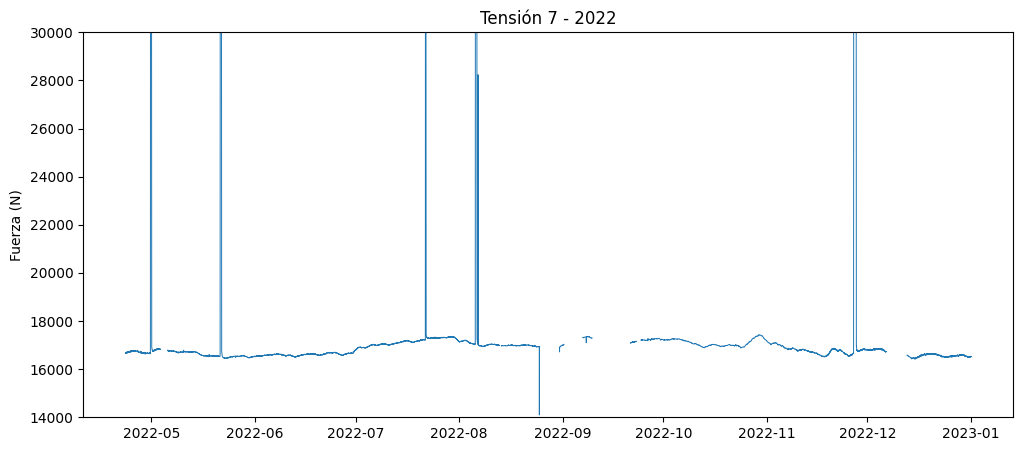

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(result_df1['time'], result_df1['Strain_Gauge_7'], linewidth=0.7)
ax.set_ylabel('Fuerza (N)')
#ax.set_ylabel('Temperatura (ºC)')

plt.ylim([14000, 30000])
plt.title('Tensión 7 - 2022')

In [ ]:
# Primero se debe cambiar los datos temporales a unidades 0, 1, 2...n

def date_to_step(df_name, gauge_n):
  """Change the time series dates to time steps"""

  df_name['time'].iloc[0]
  df_name['difftime'] = df_name['time'].diff()
  df_newname = df_name[['difftime',gauge_n]]

  # ahora convertimos el tiempo a minutos
  df_newname['Minutes'] = df_newname['difftime'] / pd.Timedelta(minutes=1)
  df_newname['steps'] = df_newname['Minutes'].cumsum()/10

  # reemplazo el primer elemento NaT por 0
  df_newname.at[0, 'steps'] = 0

  df_newname = df_newname [['steps',gauge_n]]
  return df_newname


In [ ]:
# Aplicamos la funcion al dataframe para convertir el tiempo en steps
gauge1 = date_to_step(result_df1, 'Strain_Gauge_7')

<ipython-input-7-617051eabd00>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newname['Minutes'] = df_newname['difftime'] / pd.Timedelta(minutes=1)
<ipython-input-7-617051eabd00>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newname['steps'] = df_newname['Minutes'].cumsum()/10


# Interpolacion

Extraemos los datos que queremos utilizar en el modelo de interpolacion

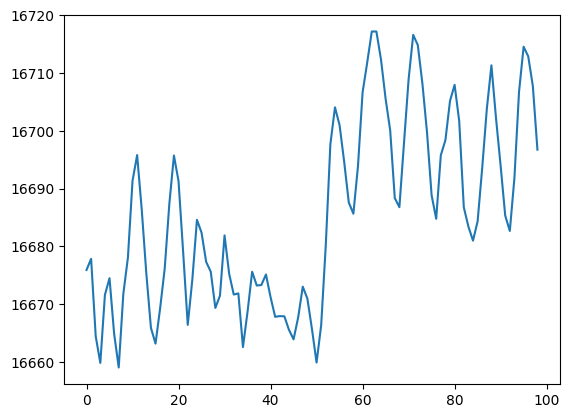

In [ ]:
index = gauge1.index     # extraigo el indice de la serie
gauge1['steps'] = index  # asigno el valor del indice a la columna step

# asigno los indices inicial y final de la serie a interpolar
start = 0
end = 99

timesteps = gauge1['steps'].iloc[start:end].index.to_series() # subset con los timesteps de la serie temporal
Xn = gauge1['Strain_Gauge_7'].iloc[start:end] # serie de datos a interpolar

plt.plot(Xn)

#timesteps = gauge1['steps'].index.to_series() # subset con los timesteps de la serie temporal
#Xn = gauge1['Strain_Gauge_1'] # serie de datos a interpolar

Primero vamos a ajustar los primeros datos a una regresion lineal para estimar los parametros iniciales del modelo

coefficient of determination: 0.4176655057853742
intercept: 16667.642117371634
slope: [0.36581262]


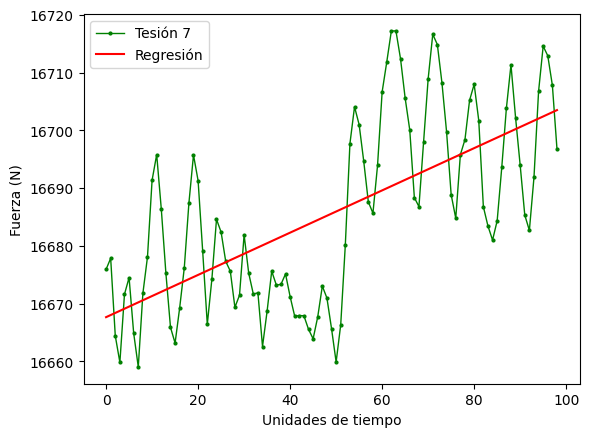

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# extraigo los 100 primeros elementos de la serie para ajustarlos con
# una regresion lineal
step = 1
inicial = 0
final = 99
x = pd.Series(range(inicial, final, step)).to_numpy().reshape(-1, 1)
y = Xn.iloc[inicial:final].to_numpy()

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

plt.plot(x, y, 'go-', linewidth=1, markersize=2, label='Tesión 7')
plt.plot(x, model.predict(x), color='red', label='Regresión')
plt.ylabel("Fuerza (N)")
plt.xlabel("Unidades de tiempo")
plt.legend()
plt.show()

Estos son los parametros iniciales del modelo

In [ ]:
A = model.intercept_
B = model.coef_
q = 1
L0 = A
M0 = B


Esta funcion implementa el metodo de Holt modificados para datos irregulares

In [ ]:
def holt_interpolation(a, c, timesteps, Xn):

  # aseguro que todos los timesteps inicien desde cero para cualquier parte de
  # la series que se analice
  index = [i for i in range(len(timesteps))] # creo el indice de la serie
  timesteps = pd.Series(index) # le asigno a la serie de tiempo valores 0, 1, 2...
  timesteps.index = index # cambio el indice de la serie a 0, 1, 2...
  Xn.index = index # le asigno a la serie de datos indices desde 0, 1, 2...

  # Rellena los valores NaN de los datos de entrada con ceros
  Xn = Xn.fillna(0)

  U0 = 1 - (1 - c)**q
  V0 = 1 - (1 - a)**q

  # Calculo de parametro Vn
  Vn = np.zeros(len(timesteps))

  for step in timesteps:
    if step == 0:
      Vn[0] = V0
    else:
      step = int(step)
      Vn[step] = Vn[step - 1] / (((1 - a)**(step - (step - 1))) + Vn[step - 1])

  # Calculo de parametro Un
  Un = np.zeros(len(timesteps))

  for step in timesteps:
    if step == 0:
      Un[0] = U0
    else:
      step = int(step)
      Un[step] = Un[step - 1] / (((1 - c)**(step - (step - 1))) + Un[step - 1])

  # Inicializacion de arrays para Ln y Mn
  Ln = np.zeros(len(timesteps))
  Mn = np.zeros(len(timesteps))
  Fn = np.zeros(len(timesteps))

  for step in timesteps:
    if step == (len(timesteps)-1): # to avoid index error
      break
    if step == 0:
      Mn[0] = M0
      Ln[0] = L0
      Fn[step] = Ln[0]
      #Fn[step] = Xn[step]
      Fn[step + 1] = L0 - M0*(step - (step - 1))

    else:
      step = int(step)
      if Xn[step] == 0:
        Xn[step] =  Xn[step-1]
        Ln[step] = (1 - Vn[step])*(Ln[step - 1] + (step - (step - 1))*Mn[step - 1]) + Vn[step]*Xn[step]
        Mn[step] = (1 - Un[step])*Mn[step - 1] + (Un[step]*(Ln[step] - Ln[step - 1])) / (step - (step - 1))
        Fn[step + 1] = Ln[step] + Mn[step]*(step - (step - 1))
      else:
        #Fn[step + 1] = Xn[step-1]
        Ln[step] = (1 - Vn[step])*(Ln[step - 1] + (step - (step - 1))*Mn[step - 1]) + Vn[step]*Xn[step]
        Mn[step] = (1 - Un[step])*Mn[step - 1] + (Un[step]*(Ln[step] - Ln[step - 1])) / (step - (step - 1))
        Fn[step + 1] = Ln[step] + Mn[step]*(step - (step - 1))


  return Fn

Estimamos los mejores parametros del modelo (a, c) utilizando las metricas mse, mae y mape

In [ ]:
# Estas línea la utilizo para interpolar la serie completa. Comentar todas estas
# líneas para interpolar la serie Xn = gauge1['Strain_Gauge_7'].iloc[start:end ]
Xn = gauge1['Strain_Gauge_7']
timesteps = gauge1['steps']

# Ahora rellenamos la serie con ceros para poder utilizarla en el algoritmo
# extendido de Holt
Xn_missing = Xn
Xn = Xn.fillna(0) # se llenan con ceros para reemplazar los missing values np.nan
start = 0
end = len(Xn)

In [ ]:
# Se estiman los parametros (a, c) que minimizan las metricas de prediccion
param1 = np.arange(0.1, 1, 0.1) # parametro a se varia de 0.1 a 0.9
arrays_list = []
c = 0.1 # el parametro c se prueba de forma manual
for a in param1:
  arrays_list.append(holt_interpolation(a, c, timesteps, Xn))


combined_numpy_array = np.vstack(arrays_list)
column_names = [i for i in range(combined_numpy_array.shape[1])]

df = pd.DataFrame(combined_numpy_array, columns=column_names)
df_transposed = df.T
df_transposed[len(param1)] = Xn


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mse_list = []
mae_list = []
mape_list = []
rmse_list = []
for k in range(0,len(param1)):
  mse_list.append(mean_squared_error(Xn, df_transposed[k],squared=False))
  mae_list.append(mean_absolute_error(Xn, df_transposed[k]))
  mape_list.append( mean_absolute_percentage_error(Xn, df_transposed[k]))


print(f" Menor rmse: {min(mse_list)} Indice: a{mse_list.index(min(mse_list))}")
print(f" Mayor rmse: {max(mse_list)} Indice: a{mse_list.index(max(mse_list))}")
print(f" Menor mae: {min(mae_list)} Indice: a{mae_list.index(min(mae_list))}")
print(f" Mayor mae: {max(mae_list)} Indice: a{mae_list.index(max(mae_list))}")
print(f" Menor mape: {min(mape_list)} Indice: a{mape_list.index(min(mape_list))}")
print(f" Mayor mape: {max(mape_list)} Indice: a{mape_list.index(max(mape_list))}")

data = {'a':param1, 'RMSE': mse_list, 'MAE': mae_list, 'MAPE': mape_list}
metric_df = pd.DataFrame(data)
metric_df

 Menor rmse: 6251.691305305722 Indice: a8
 Mayor rmse: 6398.184603183442 Indice: a0
 Menor mae: 2310.618231184927 Indice: a8
 Mayor mae: 2447.406197760066 Indice: a0
 Menor mape: 1.0320319516938926e+19 Indice: a0
 Mayor mape: 1.032039832077869e+19 Indice: a1


,a,RMSE,MAE,MAPE
0,0.1,6398.184603,2447.406198,1.032032e+19
1,0.2,6293.335632,2367.378224,1.032040e+19
2,0.3,6269.728771,2342.390341,1.032039e+19
3,0.4,6260.995723,2330.462350,1.032037e+19
4,0.5,6256.874338,2323.295179,1.032036e+19
5,0.6,6254.607782,2318.551985,1.032035e+19
6,0.7,6253.225612,2315.182618,1.032035e+19
7,0.8,6252.318750,2312.625974,1.032034e+19
8,0.9,6251.691305,2310.618231,1.032034e+19


Vemos que los menores valores para las metricas mse, mae y mape resultaron para el parametro a8

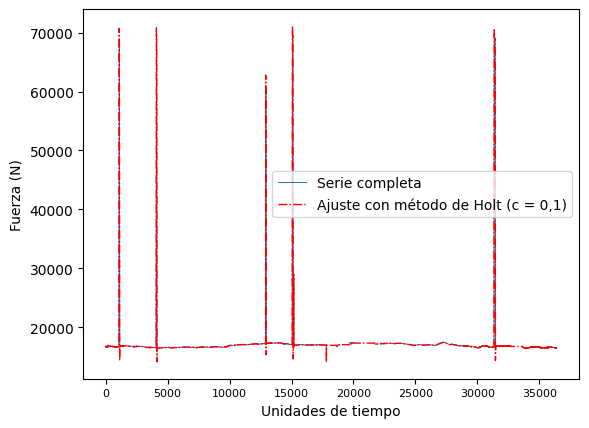

In [ ]:
# Ajuste de la serie con los parametros (a, c) optimos utilizando el
# metodo de Holt extendido en donde df_transposed[k] es el resultado del ajuste
# del alisado de Holt y k corresponde con el parametro "a" que minimiza las
# metricas

# Rellena los ceros de las series con np.nan para visualizacion
#Xn= Xn.replace(0, np.nan)
#df_transposed[8] = df_transposed[8].replace(0, np.nan)

fig, ax = plt.subplots()
plt.plot(np.arange(1, len(timesteps) + 1)[start:end], Xn_missing.iloc[start:end], linewidth=0.7, label='Serie completa')
# en la linea de abajo mae_list.index(min(mae_list)) es el indice correspondiente al valor del menor MAE
plt.plot(df_transposed[mae_list.index(min(mae_list))].iloc[start:end], 'r-.', linewidth=1, label='Ajuste con método de Holt (c = 0,1)')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Unidades de tiempo")
plt.ylabel("Fuerza (N)")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

## Simulación de interpolación con valores faltantes

In [ ]:
# Esta funcion sirve para simular una serie con missing values

def replace_rand(input_series, rand_idx, initial_idx):
  """ This function replaces elements randomly from a series. If rand_idx is True
      then it returns random indices, otherwise an initial index should be input
  """

  output_series = input_series.copy()

  # Set the seed (optional, to reproduce the same random indices)
  #np.random.seed(42)
  np.random.seed()

  # Generate random indices to replace with zeros
  num_elements = int(0.10*(len(input_series)))  # Number of elements to replaced

  if rand_idx == True:
    random_indices = np.random.choice(input_series.index, size=num_elements, replace=False)
    output_indices = random_indices
  else:
    specific_indices = Xn.index[initial_idx:len(Xn)]
    output_indices = specific_indices

  # Update the Series with np.nan at the selected indices
  output_series[output_indices] = np.nan # value used to replace

  return output_series

In [ ]:
missing_data = replace_rand(Xn, True, len(Xn))  # se llama a la función para reemplazar elementos de Xn

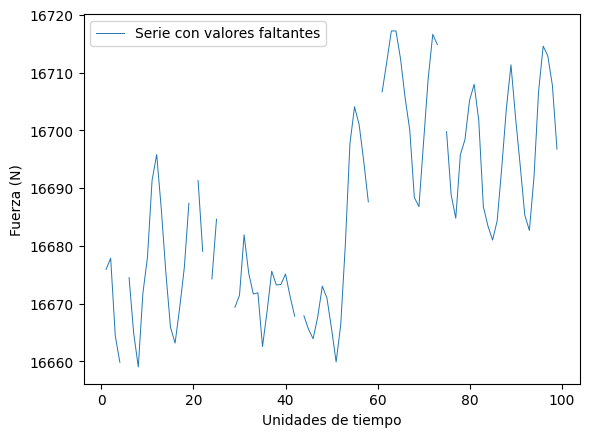

In [ ]:
# Ahora graficamos la nueva serie simulada con missing values

fig, ax = plt.subplots()
plt.plot(np.arange(1, len(timesteps) + 1), missing_data, linewidth=0.7, label='Serie con valores faltantes')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Unidades de tiempo")
plt.ylabel("Fuerza (N)")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [ ]:
# Ahora rellenamos la serie con ceros para poder utilizarla en el algoritmo
# extendido de Holt

output_data = missing_data.fillna(0) # se llenan con ceros para reemplazar los missing values np.nan

In [ ]:
# Ejecutamos el alisado de Holt para ajustar los datos simulados con missing values

param1 = np.arange(0.1, 1, 0.1)
arrays_list = []
c = 0.1
for a in param1:
  arrays_list.append(holt_interpolation(a, c, timesteps, output_data))


combined_numpy_array = np.vstack(arrays_list)
column_names = [i for i in range(combined_numpy_array.shape[1])]

dframe = pd.DataFrame(combined_numpy_array, columns=column_names)
dframe_transposed = dframe.T
dframe_transposed[9] = output_data


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse_list = []
mae_list = []
mape_list = []
for k in range(0,9):
  mse_list.append(mean_squared_error(output_data, dframe_transposed[k]))
  mae_list.append(mean_absolute_error(output_data, dframe_transposed[k]))
  mape_list.append(mean_absolute_percentage_error(output_data, dframe_transposed[k]))

print(f" Menor mse: {min(mse_list)} Indice: a{mse_list.index(min(mse_list))}")
print(f" Mayor mse: {max(mse_list)} Indice: a{mse_list.index(max(mse_list))}")
print(f" Menor mae: {min(mae_list)} Indice: a{mae_list.index(min(mae_list))}")
print(f" Mayor mae: {max(mae_list)} Indice: a{mae_list.index(max(mae_list))}")
print(f" Menor mape: {min(mape_list)} Indice: a{mape_list.index(min(mape_list))}")
print(f" Mayor mape: {max(mape_list)} Indice: a{mape_list.index(max(mape_list))}")

data = {'a':param1, 'MSE': mse_list, 'MAE': mae_list, 'MAPE': mape_list}
metric_df = pd.DataFrame(data)
metric_df

 Menor mse: 25301492.20844739 Indice: a0
 Mayor mse: 25308993.307352085 Indice: a3
 Menor mae: 1523.6620500052804 Indice: a8
 Mayor mae: 1526.5252653119087 Indice: a0
 Menor mape: 6.830223761376779e+18 Indice: a0
 Mayor mape: 6.831244291325869e+18 Indice: a3


,a,MSE,MAE,MAPE
0,0.1,2.530149e+07,1526.525265,6.830224e+18
1,0.2,2.530747e+07,1525.406742,6.831037e+18
2,0.3,2.530887e+07,1525.116194,6.831226e+18
3,0.4,2.530899e+07,1525.026862,6.831244e+18
4,0.5,2.530843e+07,1524.931230,6.831169e+18
5,0.6,2.530748e+07,1524.682070,6.831042e+18
6,0.7,2.530635e+07,1524.352733,6.830891e+18
7,0.8,2.530521e+07,1524.023654,6.830737e+18
8,0.9,2.530415e+07,1523.662050,6.830595e+18


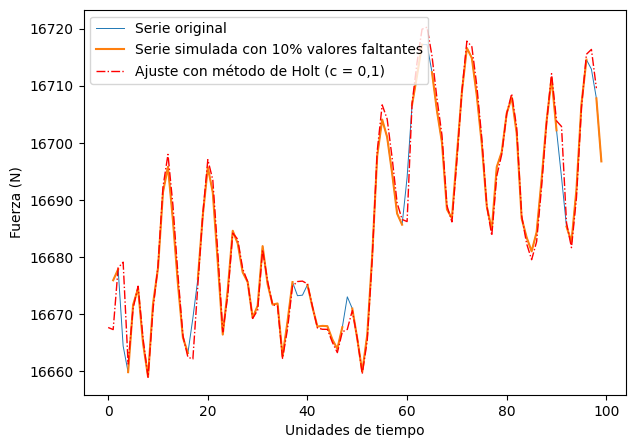

In [ ]:
# Graficamos el resultado del ajuste del alisado de Holt con los datos de prueba

fig, ax = plt.subplots(figsize=(7,5))
#plt.plot(result_df1['time'].iloc[start:end], missing_data.iloc[start:end], linewidth=0.7, label='Serie simulada con valores faltantes')
plt.plot(np.arange(1, len(timesteps)+1), Xn.iloc[start:end], linewidth=0.7, label='Serie original')
plt.plot(np.arange(1, len(timesteps)+1), missing_data.iloc[start:end], linewidth=1.5, label='Serie simulada con 10% valores faltantes')
plt.plot(np.arange(0, len(timesteps)), dframe_transposed[mae_list.index(min(mae_list))].iloc[start:end], 'r-.', linewidth=1, label='Ajuste con método de Holt (c = 0,1)')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Unidades de tiempo")
plt.ylabel("Fuerza (N)")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [ ]:
print(f" MSE: {mean_squared_error(Xn.iloc[start:end], dframe_transposed[mae_list.index(min(mae_list))].iloc[start:end])}")
print(f" MAE: {mean_absolute_error(Xn.iloc[start:end], dframe_transposed[mae_list.index(min(mae_list))].iloc[start:end])}")
print(f" MAPE: {mean_absolute_percentage_error(Xn.iloc[start:end], dframe_transposed[mae_list.index(min(mae_list))].iloc[start:end])}")

 MSE: 81.77913390758378
 MAE: 7.767442260298787
 MAPE: 0.0004654839664655731


# Pruebas de estacionaridad

<Axes: >

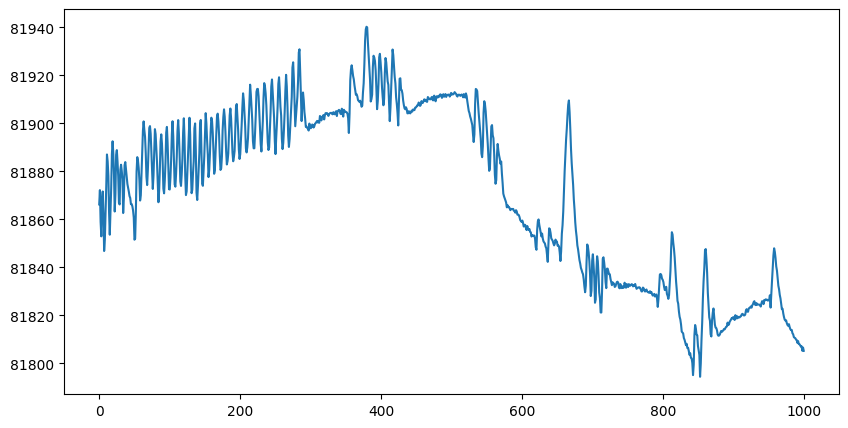

In [ ]:
start_idx = 0
end_idx = 1000


#new_index = range(0, end_idx-start_idx)

#strain_7 = Xn.iloc[start_idx:end_idx]
#strain_7.index = new_index

strain_7 = df1['Strain_Gauge_7'].iloc[0:1000]
strain_8 = df1['Strain_Gauge_8'].iloc[0:1000]
strain_9 = df1['Strain_Gauge_9'].iloc[0:1000]

strain_9.plot(figsize=(10,5))

Se observa claramente que la serie cambia de nivel, por lo tanto es posible que no sea estacionaria (por tramos). Vamos a aplicar el test ADF para verificar la estacionaridad de la serie.

El estadístico se compara con los valores críticos en diferentes niveles de significación, generalmente 1%, 5% y 10%. Si el estadístico es más negativo que el valor crítico, puede rechazarse la hipótesis nula y concluir que la serie temporal es estacionaria. Por el contrario, si el estadístico es menos negativo que el valor crítico, no se puede rechazar la hipótesis nula y se concluiye que la serie temporal tiene una raíz unitaria. El valor p es la probabilidad de obtener un estadístico tan extremo o más extremo que el observado bajo la hipótesis nula.

In [ ]:
#Probando estacionaridad con el estadistico ADF
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(strain_7)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'critical values: {ADF_result[4]}')

ADF Statistic: -0.6913822108134782
p-value: 0.8489691293273072
critical values: {'1%': -3.4370471695043037, '5%': -2.8644967585264784, '10%': -2.5683443301882956}


**Hipotesis nula**: la serie temporal tiene una raiz unitaria y por lo tanto es no estacionaria.

**Hipotesis alternativa**: la serie temporal no tiene una raiz unitaria y por lo tanto es estacionaria

De los resultados observamos que el estadístico es menos negativo que el valor crítico a un 5% de significancia, por lo tanto no se puede rechazar la hipótesos nula y se concluye que la serie temporal no es estacionaria. Podemos apoyar aún más esta conclusión al graficar la función de autocorrelación.

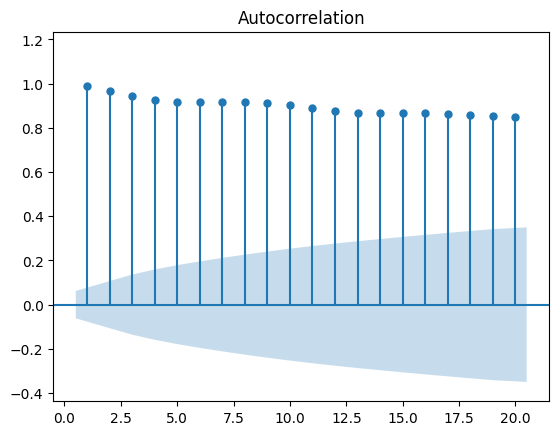

In [ ]:
with mpl.rc_context():
    mpl.rc("figure")  # here adjust the figure size
    plot_acf(strain_7, lags=20, zero=False, auto_ylims=True)

En la figura notamos que la autocorrelación decrece lentamente con el retardo, lo cual es una clara indicación de un proceso no estacionario. Ahora aplicaremos una transformación a la serie para convertirla en estacionaria. Se aplicará una diferenciación de primer orden.

Graficamos la ACF para strain_gauge_8

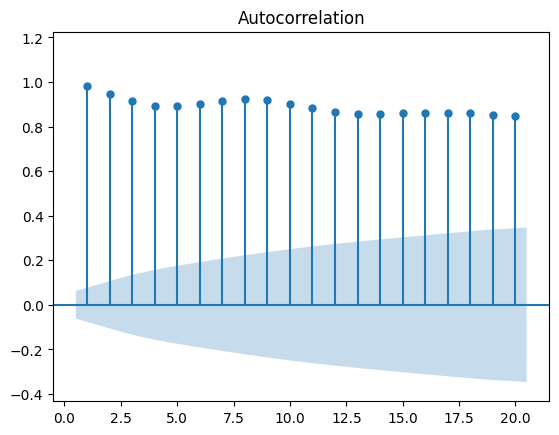

In [ ]:
with mpl.rc_context():
    mpl.rc("figure")  # here adjust the figure size
    plot_acf(strain_8, lags=20, zero=False, auto_ylims=True)

Y ahora graficamos la ACF para strain_gauge_9

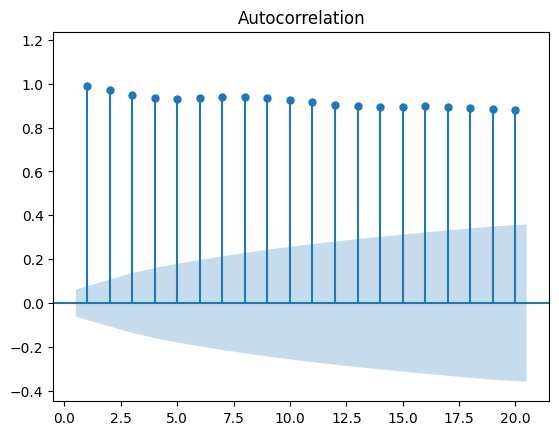

In [ ]:
with mpl.rc_context():
    mpl.rc("figure")  # here adjust the figure size
    plot_acf(strain_9, lags=20, zero=False, auto_ylims=True)

Text(0, 0.5, 'Valor')

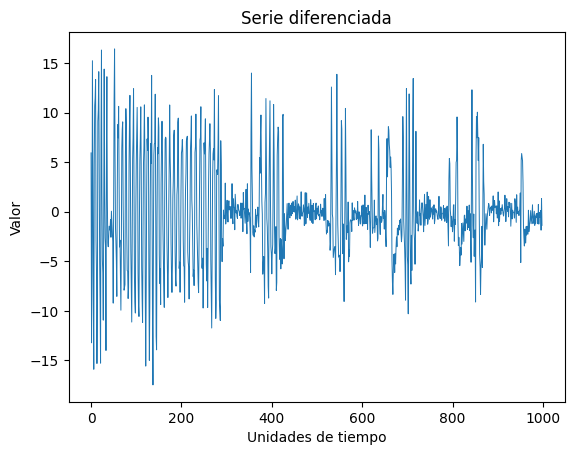

In [ ]:
diff_strain_7 = np.diff(strain_7, n=1)
diff_strain_8 = np.diff(strain_8, n=1)
diff_strain_9 = np.diff(strain_9, n=1)
plt.plot(diff_strain_9, linewidth=0.7)
plt.xlabel("Unidades de tiempo")
plt.title('Serie diferenciada')
plt.ylabel("Valor")

Ahora vamos a aplicar el test de estacionaridad a la serie diferenciada para probar si el proceso es ahora estacionario.

In [ ]:
#Probando estacionaridad con el estadistico ADF
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(diff_strain_7)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'critical values: {ADF_result[4]}')

ADF Statistic: -10.210650734774713
p-value: 5.650044884969581e-18
critical values: {'1%': -3.4370471695043037, '5%': -2.8644967585264784, '10%': -2.5683443301882956}


Se observa que el estadístico es más negativo que los valores críticos, por lo que podemos concluir que el proceso es ahora estacionario. Ahora veamos el resultado de la función de autocorrelación para este proceso.

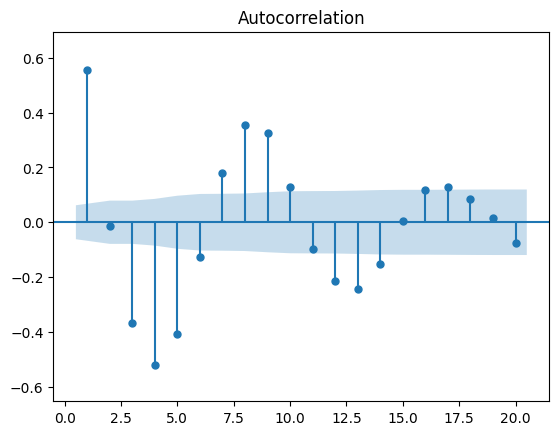

In [ ]:
with mpl.rc_context():
    mpl.rc("figure")  # here adjust the figure size
    plot_acf(diff_strain_9, lags=20, zero=False, auto_ylims=True)

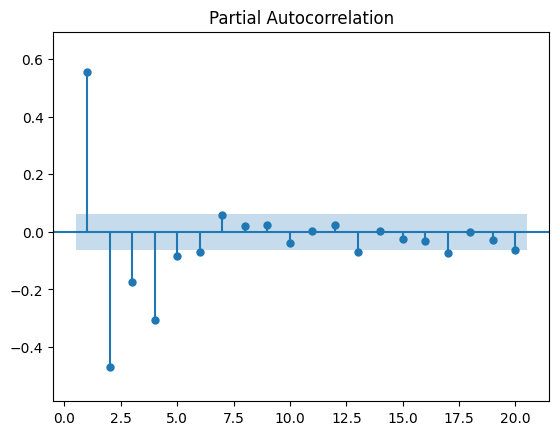

In [ ]:
with mpl.rc_context():
    mpl.rc("figure")  # here adjust the figure size
    plot_pacf(diff_strain_9, lags=20, zero=False, auto_ylims=True)

## Modelo ARMA

Vamos a realizar predicciones utilizando rolling forecast.

Creamos los conjuntos de entrenamiento y de prueba

In [ ]:
df_diff = pd.DataFrame({'diff_strain_9': diff_strain_9})
train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

# to be used for ARIMA model
#df_arima = strain_7.to_frame()
#train_arima = df_arima[:int(0.9*len(df_arima))]
#test_arima = df_arima[int(0.9*len(df_arima)):]

Ahora vamos a utilizar el modelo SARIMAX de Python para ajustar los diferentes modelos disponibles: MA(q), AR(p) y ARMA(p,q). Crearemos una funcion que ajustara diferentes modelos y se elegira el que resulte con el menor AIC

In [ ]:
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame: #this definition use for ARMA model
#def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:

  results = []

  for order in tqdm(order_list):
    try:
      model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)  # line used for ARMA model
      #model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
    except:
      continue

    aic = model.aic
    results.append([order, aic])

  result_df = pd.DataFrame(results)
  result_df.columns = ['(p,q)', 'AIC']

  #Sort in ascending order, lower AIC is better
  result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

  return result_df

Se crean los arrays para realizar una combinacion de los valores de p y q.

In [ ]:
from itertools import product
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 1 # to use in ARIMA(p,d,q)

order_list = list(product(ps, qs))

Se ajustan los diferentes modelos ARMA(p,q) a la serie para elegir el mejor modelo segun el resultado del AIC

In [ ]:
result_df = optimize_ARMA(train, order_list)  # use for ARMA model
#result_df = optimize_ARIMA(train_arima, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(3, 3)",4787.470351
1,"(2, 3)",4788.152096
2,"(3, 2)",4803.975202
3,"(2, 2)",4820.124141
4,"(2, 1)",4822.394997
5,"(3, 1)",4822.814933
6,"(3, 0)",4884.644238
7,"(1, 3)",4901.169872
8,"(2, 0)",4906.678246
9,"(1, 2)",4972.370793


Ahora probamos el mejor modelo elegido por el AIC

In [ ]:
model = SARIMAX(train, order=(3,0,3), simple_differencing=False) # ARMA(p,q) model
#model = SARIMAX(train_arima, order=(3,1,3), simple_differencing=False)  # here order is (p,d,q)
                                                                  # p is for AR(p)
                                                                  # d if differencing order for ARIMA model
                                                                  # q is for MA(q)
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          diff_strain_9   No. Observations:                  899
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -2386.735
Date:                Mon, 29 Jan 2024   AIC                           4787.470
Time:                        23:26:46   BIC                           4821.079
Sample:                             0   HQIC                          4800.310
                                - 899                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1548      0.119      9.732      0.000       0.922       1.387
ar.L2         -0.5340      0.151     -3.532      0.000      -0.830      -0.238
ar.L3         -0.1835      0.085     -2.162      0.0

Ahora realizamos un analisis sobre los residuos para verificar la calidad de nuestro modelo. Si los residuos son ruido blanco, quiere decir que nuestro modelo es ideal y de buena calidad

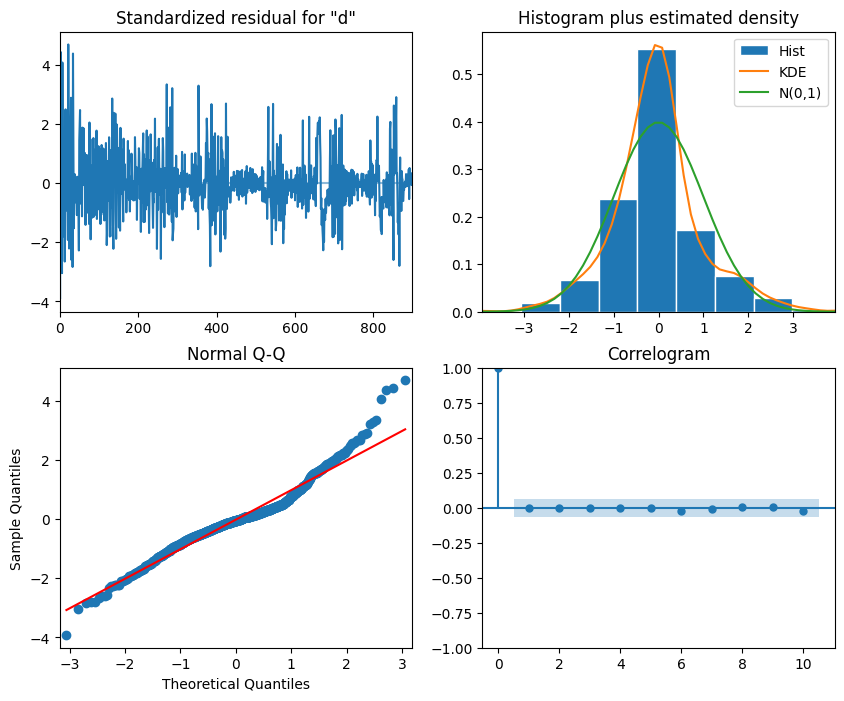

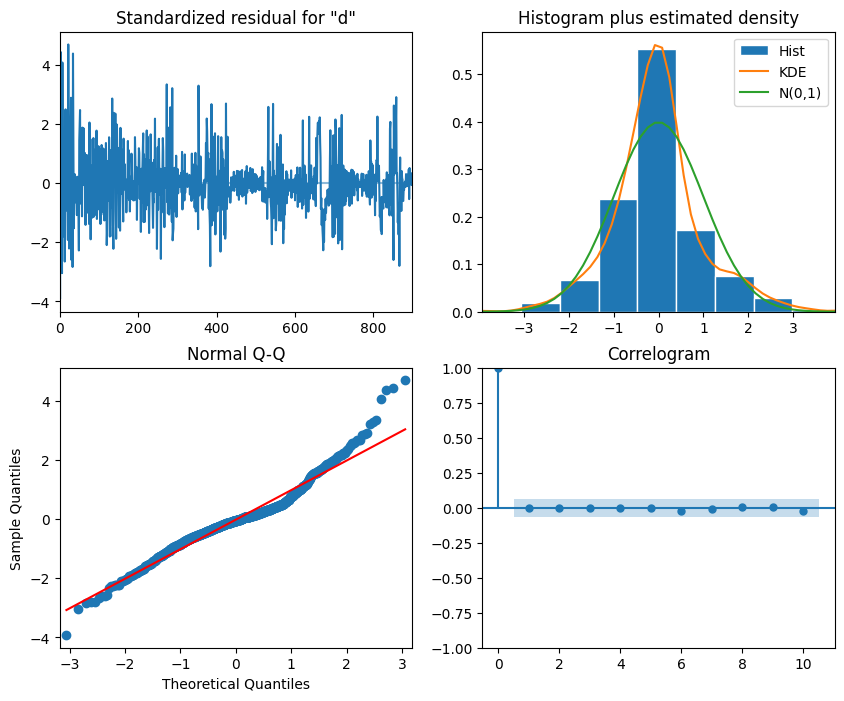

In [ ]:
model_fit.plot_diagnostics(figsize=(10, 8))

Por ultimo verificamos con el metodo de LjungBox que los residuos sean ruido blanco. Para esto el resultado del lb_pvalue debe ser mayor que p = 0.05.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = model_fit.resid

pvalue = acorr_ljungbox(residuals, lags=np.arange(1, 11, 1))

print(pvalue)

     lb_stat  lb_pvalue
1   0.077975   0.780060
2   0.090588   0.955716
3   0.093193   0.992642
4   0.094182   0.998925
5   0.094378   0.999859
6   1.006358   0.985370
7   1.016163   0.994564
8   1.016949   0.998139
9   1.067960   0.999264
10  1.553629   0.998758


Utilizamos los valores de p y q que dieron como resultado el menor AIC. Estos valores se utilizaran en la función para realizar las predicciones mediante rolling forecast

In [ ]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

  total_len = train_len + horizon
  end_idx = train_len

  if method == 'mean':
    pred_mean = []

    for i in range(train_len, total_len, window):
      mean = np.mean(df[:i].values)
      pred_mean.extend(mean for _ in range(window))

    return pred_mean

  elif method == 'last':
    pred_last_value = []

    for i in range(train_len, total_len, window):
      last_value = df[:i].iloc[-1].values[0]
      pred_last_value.extend(last_value for _ in range(window))

    return pred_last_value


  #elif method == 'MA':
  #elif method == 'AR':
  elif method == 'ARMA':
    #pred_MA = []
    #pred_AR = []
    pred_ARMA = []

    for i in range(train_len, total_len, window):
      model = SARIMAX(df[:i], order=(3,0,3))  # this is for ARMA(p,q) model
      #model = SARIMAX(df[:i], order=(2,0,0)) # this is for AR(p) model
      #model = SARIMAX(df[:i], order=(0,0,1)) # this is for MA(q) model
      res = model.fit(disp=False)
      predictions = res.get_prediction(0, i + window - 1)
      oos_pred = predictions.predicted_mean.iloc[-window:]
      #pred_MA.extend(oos_pred)
      #pred_AR.extend(oos_pred)
      pred_ARMA.extend(oos_pred)


    #return pred_MA
    #return pred_AR
    return pred_ARMA


Ahora utilizamos la función de rolling forecast para realizar las predicciones para cada método

In [ ]:
#pred_df = test_arima.copy()   # use for ARIMA model
pred_df = test.copy()

TRAIN_LEN = len(train)
#TRAIN_LEN = len(train_arima)   # for ARIMA models
HORIZON = len(test)
#HORIZON = len(test_arima)   # use only for ARIMA models
WINDOW = 1

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')    # use df_diff for stationary models and train_arima for ARIMA
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')   # use df_diff for stationary models and train_arima for ARIMA
#pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')
#pred_AR = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'AR')
pred_ARMA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')
#pred_ARIMA = rolling_forecast(train_arima, TRAIN_LEN, HORIZON, WINDOW, 'ARIMA')

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
#pred_df['pred_MA'] = pred_MA
#pred_df['pred_AR'] = pred_AR
pred_df['pred_ARMA'] = pred_ARMA
#pred_df['pred_ARIMA'] = pred_ARIMA

pred_df

,diff_strain_9,pred_mean,pred_last_value,pred_ARMA
899,-0.636133,-0.052217,0.594857,0.350218
900,-0.568815,-0.052866,-0.636133,-0.897001
901,2.001237,-0.053438,-0.568815,-0.002160
902,-1.407617,-0.051160,2.001237,1.397462
903,1.106445,-0.052662,-1.407617,-1.657385
...,...,...,...,...
994,-0.460742,-0.059146,-0.555208,-0.608124
995,0.133529,-0.059549,-0.460742,0.345117
996,-1.855664,-0.059355,0.133529,0.179331
997,1.345313,-0.061157,-1.855664,-1.044688


Graficamos los resultados de aplicar el rolling forecast

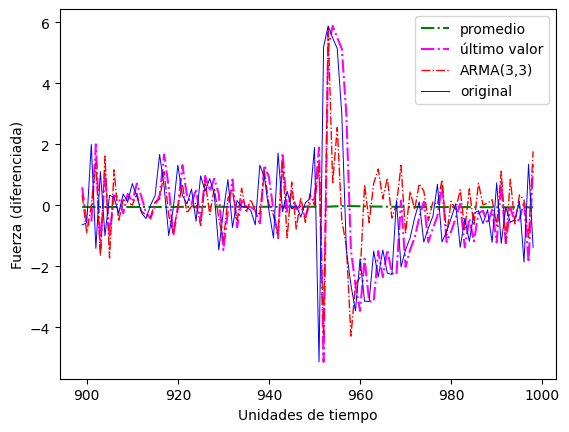

In [ ]:
# Plotting both the curves simultaneously
plt.plot(pred_df['pred_mean'], 'g-.', label='promedio')
plt.plot(pred_df['pred_last_value'], ls='dashdot', c='magenta', label='último valor')
#plt.plot(pred_df['pred_MA'], 'r-.', linewidth=1, label='MA(1)')
#plt.plot(pred_df['pred_AR'], 'r-.', linewidth=0.7, label='AR(2)')
plt.plot(pred_df['pred_ARMA'], 'r-.', linewidth=1, label='ARMA(3,3)')
plt.plot(pred_df['diff_strain_9'], linewidth=0.7, color='b', label='original')  # use 'diff_strain_7' for stationary models

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Unidades de tiempo")
plt.ylabel("Fuerza (diferenciada)")
#plt.ylabel("Fuerza (N)")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

Ahora vamos a calcular la exactitud de los métodos mediante la métrica MSE

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


rmse_mean = mean_squared_error(pred_df['diff_strain_9'], pred_df['pred_mean'],squared=False)
rmse_last = mean_squared_error(pred_df['diff_strain_9'], pred_df['pred_last_value'],squared=False)
#mse_MA = mean_squared_error(pred_df['diff_strain_8'], pred_df['pred_MA'])
#rmse_AR = mean_squared_error(pred_df['diff_strain_8'], pred_df['pred_AR'],squared=False)
rmse_ARMA = mean_squared_error(pred_df['diff_strain_9'], pred_df['pred_ARMA'],squared=False)
#rmse_ARIMA = mean_squared_error(pred_df['diff_strain_8'], pred_df['pred_ARIMA'],squared=False)
print(rmse_mean, rmse_last, rmse_ARMA)

1.6650111629422009 1.8108714976794624 1.9122181265686116


Ahora vamos a regresar a las unidades originales para comparar la prediccióm de del modelo con los datos originales

In [ ]:
#pred_strain_8 = strain_8[900] + pred_df['pred_MA'].cumsum()
#pred_strain_8 = strain_8.loc[len(train)] + pred_df['pred_AR'].cumsum()
pred_strain_9 = strain_9[int(0.9*len(df_diff))] + pred_df['pred_ARMA'].cumsum()
#pred_strain_8 = strain_8[int(0.9*len(df_diff))] + pred_df['pred_ARIMA'].cumsum()

Calculo el promedio de la serie desde 900 a 1000

In [ ]:
#mean_series = pd.Series(np.repeat(np.mean(strain_7.iloc[900:1000]), 100))
mean_series = pd.Series(np.repeat(np.mean(strain_9.iloc[len(train)+1:len(strain_9)]), int(len(strain_9)/10)))
mean_series

# Create a new index ranging from 900 to 1000 (inclusive)
#new_index = range(900, 1000)
new_index = range(len(train)+1, len(strain_9))

# Set the new index to the Series
mean_series.index = new_index

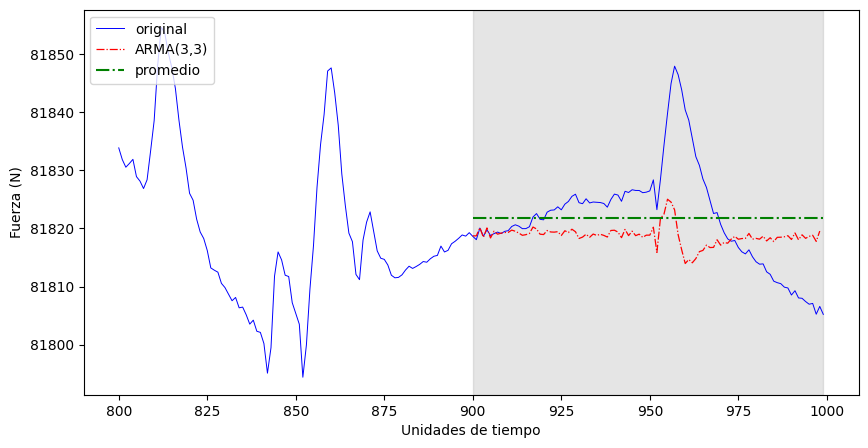

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(strain_9[int(len(strain_9)*0.8):], 'b-', linewidth=0.7, label='original')
#ax.plot(pred_strain_8.loc[pred_df.index[start]:pred_df.index[-1]], 'r-.', linewidth=0.7, label='AR(2)')
#ax.plot(pred_strain_7.loc[900:998], 'r-.', linewidth=0.9, label='MA(1)')
ax.plot(pred_strain_9.loc[900:998], 'r-.', linewidth=0.9, label='ARMA(3,3)')
#ax.plot(test_arima['ARIMA_pred'], 'r-.', linewidth=1, label='ARIMA(3,1,3)')
ax.plot(mean_series, 'g-.', label='promedio')
ax.legend(loc=2)

ax.set_xlabel('Unidades de tiempo')
ax.set_ylabel('Fuerza (N)')

#plt.ylim(16550, 16850)
ax.axvspan(int(0.9*len(strain_9)), len(strain_9)-1, color='#808080', alpha=0.2)

In [ ]:
#mae_ARMA = mean_absolute_error(strain_7.loc[900:998], pred_strain_7.loc[900:998])
#mape_ARMA = mean_absolute_percentage_error(strain_7.loc[len(train)+1:pred_df.index[-1]], pred_strain_7.loc[len(train)+1:pred_df.index[-1]])
#mape_mean = mean_absolute_percentage_error(strain_8.loc[len(train)+1:pred_df.index[-1]], mean_series.loc[len(train)+1:pred_df.index[-1]])

mae_ARMA = mean_absolute_error(strain_9.loc[len(train)+1:pred_df.index[-1]], pred_strain_9.loc[len(train)+1:pred_df.index[-1]])
mae_mean = mean_absolute_error(strain_9.loc[len(train)+1:pred_df.index[-1]], mean_series.loc[len(train)+1:pred_df.index[-1]])

print(mae_mean, mae_ARMA)

6.401995456309206 6.800524741293765


## Utilizando modelos SARIMAX

Las variables exogenas seran la temperatura y humedad

In [ ]:
# to be used for SARIMAX model
df_sarimax = strain_9.to_frame()
train_sarimax = df_sarimax[:int(0.9*len(df_sarimax))]
test_sarimax = df_sarimax[int(0.9*len(df_sarimax)):]


exog = df1[['Vault_temp']].iloc[0:1000]

In [ ]:
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame: #this definition use for ARMA model

  results = []

  for order in tqdm(order_list):
    try:
      model = SARIMAX(endog, exog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)  # line used for ARMA model
    except:
      continue

    aic = model.aic
    results.append([order, aic])

  result_df = pd.DataFrame(results)
  result_df.columns = ['(p,q,P,Q)', 'AIC']

  #Sort in ascending order, lower AIC is better
  result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

  return result_df

In [ ]:
from itertools import product
p = range(0, 4, 1)
q = range(0, 4, 1)
P = [0]
d = 1 # to use in ARIMA(p,d,q)
D = 0
Q = [0]
s = 0
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [ ]:
exog_train = exog[:int(0.9*len(exog))]

In [ ]:
result_df = optimize_SARIMAX(train_sarimax, exog_train, parameters_list, d, D, s)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q,P,Q)",AIC
0,"(2, 3, 0, 0)",4690.376530
1,"(2, 1, 0, 0)",4706.689640
2,"(2, 2, 0, 0)",4708.686235
3,"(3, 1, 0, 0)",4708.688091
4,"(3, 2, 0, 0)",4710.315449
5,"(3, 3, 0, 0)",4712.406482
6,"(3, 0, 0, 0)",4787.755860
7,"(1, 3, 0, 0)",4790.844524
8,"(2, 0, 0, 0)",4820.362266
9,"(1, 2, 0, 0)",4853.421263


In [ ]:
best_model = SARIMAX(train_sarimax, exog_train, order=(2,1,3), simple_differencing=False)
best_model_fit = best_model.fit(disp=False)

In [ ]:
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Strain_Gauge_9   No. Observations:                  900
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2338.188
Date:                Sun, 04 Feb 2024   AIC                           4690.377
Time:                        13:49:53   BIC                           4723.986
Sample:                             0   HQIC                          4703.216
                                - 900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Vault_temp    32.7191      2.556     12.800      0.000      27.709      37.729
ar.L1          1.3864      0.030     46.480      0.000       1.328       1.445
ar.L2         -0.8209      0.026    -31.191      0.0

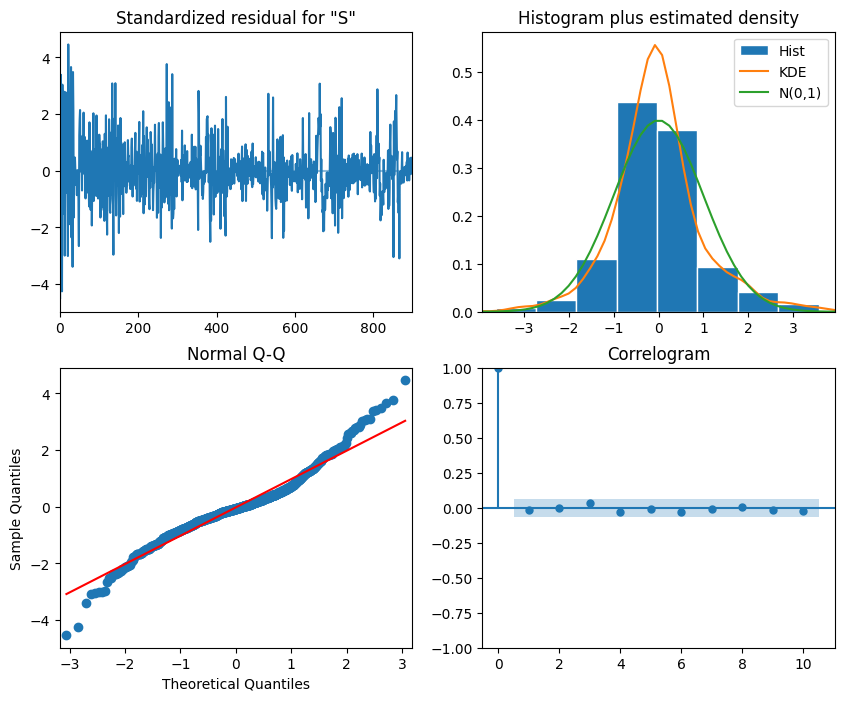

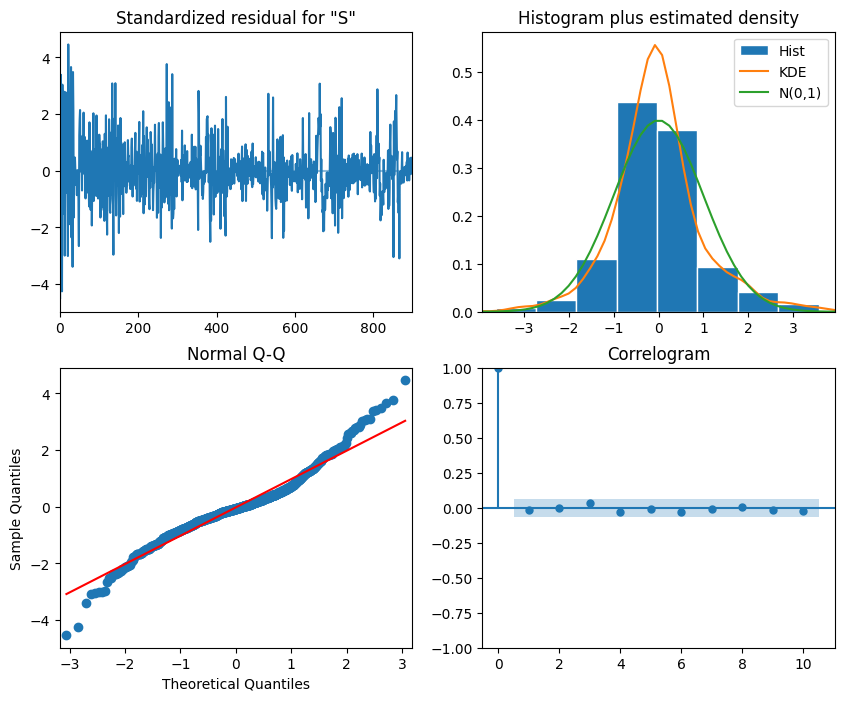

In [ ]:
best_model_fit.plot_diagnostics(figsize=(10,8))

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = best_model_fit.resid

pvalue = acorr_ljungbox(residuals, lags=np.arange(1, 11, 1))

print(pvalue)

         lb_stat  lb_pvalue
1   5.632121e-07   0.999401
2   4.422921e-05   0.999978
3   4.927817e-05   1.000000
4   6.683068e-05   1.000000
5   6.836220e-05   1.000000
6   7.908781e-05   1.000000
7   1.082430e-04   1.000000
8   1.198994e-04   1.000000
9   1.199575e-04   1.000000
10  1.215252e-04   1.000000


In [ ]:
def recursive_forecast(endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:

  total_len = train_len + horizon

  if method == 'last':
    pred_last_value = []

    for i in range(train_len, total_len, window):
      last_value = endog[:i].iloc[-1]
      pred_last_value.extend(last_value for _ in range(window))

    return pred_last_value

  elif method == 'SARIMAX':
    pred_SARIMAX = []

    for i in range(train_len, total_len, window):
      model = SARIMAX(endog[:i], exog[:i], order=(2,1,3), simple_differencing=False)
      res = model.fit(disp=False)
      predictions = res.get_prediction(exog=exog)
      oos_pred = predictions.predicted_mean.iloc[-window:]
      pred_SARIMAX.extend(oos_pred)

    return pred_SARIMAX

In [ ]:
pred_df = test_sarimax.copy()

TRAIN_LEN = len(train_sarimax)
HORIZON = len(test_sarimax)   # use only for ARIMA models
WINDOW = 1

pred_SARIMAX = recursive_forecast(df_sarimax, exog, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')
pred_df['pred_SARIMAX'] = pred_SARIMAX

pred_df

In [ ]:
# change de index of dataframe to make the graph to coincide as pred_df['pred_SARIMAX']
# is shifted to the right about 2 steps
pred_df = pred_df.set_index(np.arange(898, 998))

In [ ]:
mean_series = pd.Series(np.repeat(np.mean(strain_9.iloc[900:1000]), 100))
mean_series

# Create a new index ranging from 900 to 1000 (inclusive)
new_index = range(900, 1000)

# Set the new index to the Series
mean_series.index = new_index

In [ ]:
rmse_SARIMAX = mean_squared_error(pred_df['Strain_Gauge_9'], pred_df['pred_SARIMAX'],squared=False)
rmse_mean = mean_squared_error(pred_df['Strain_Gauge_9'], mean_series,squared=False)
mae_SARIMAX = mean_absolute_error(pred_df['Strain_Gauge_9'], pred_df['pred_SARIMAX'])
mape_SARIMAX = mean_absolute_percentage_error(pred_df['Strain_Gauge_9'], pred_df['pred_SARIMAX'])
mae_mean = mean_absolute_error(pred_df['Strain_Gauge_9'], mean_series)
mape_mean = mean_absolute_percentage_error(pred_df['Strain_Gauge_9'], mean_series)
print(rmse_SARIMAX, mae_SARIMAX, mape_SARIMAX, rmse_mean, mae_mean, mape_mean)

3.0577006636150696 1.9359974963542481 2.3659956170412458e-05 8.823343969921632 6.503192372231133 7.947864413681608e-05


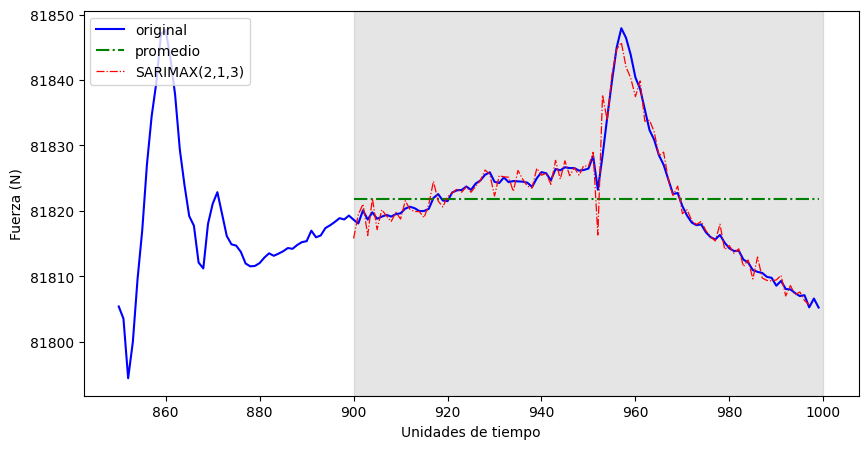

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_sarimax[int(len(df_sarimax)*0.85):], 'b-', label='original')
ax.plot(mean_series, 'g-.', label='promedio')
ax.plot(pred_df['pred_SARIMAX'].loc[900:997], 'r-.', linewidth=0.9, label='SARIMAX(2,1,3)')
ax.legend(loc=2)

ax.set_xlabel('Unidades de tiempo')
ax.set_ylabel('Fuerza (N)')

#plt.ylim(16550, 16850)
ax.axvspan(int(0.9*len(df_sarimax)), len(df_sarimax), color='#808080', alpha=0.2)